In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
columnas = [
    "Tipo",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

datos = pd.read_table("C:/Users/1/OneDrive - Universidad Nacional Abierta y a Distancia/Periodo 2023 II 16-04 (1394)/1 - ANALISIS DE DATOS - (202016908)/Etapa 2/ArbolesDecision/wine.data", delimiter=',', names = columnas)

In [3]:
#Revisar Variable
datos.head()

,Tipo,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

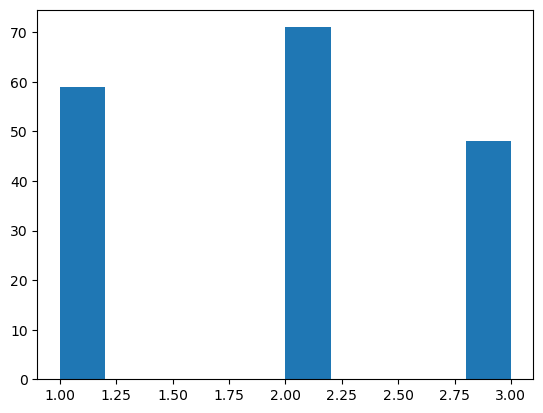

In [4]:
#Creamos un histograma
plt.hist(datos.Tipo)

In [5]:
#Crear preditores y variable objetiva
predictors_col = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
target_col = ['Tipo']

In [6]:
#Dividimos los datos en entrenamiento y prueba

predictors = datos[predictors_col]
target = datos[target_col]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=11)

In [7]:
#Asignar variable al arbol de desiciones
tree = DecisionTreeClassifier()

In [8]:
#Asignar variable a los datos de entrenamiento
arbol = tree.fit(X_train, y_train)

[Text(0.4444444444444444, 0.9, 'x[9] <= 3.82\ngini = 0.66\nsamples = 133\nvalue = [41, 53, 39]'),
 Text(0.2222222222222222, 0.7, 'x[12] <= 790.0\ngini = 0.117\nsamples = 48\nvalue = [3, 45, 0]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3333333333333333, 0.5, 'x[9] <= 3.365\ngini = 0.5\nsamples = 6\nvalue = [3, 3, 0]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[6] <= 1.58\ngini = 0.581\nsamples = 85\nvalue = [38, 8, 39]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.7777777777777778, 0.5, 'x[12] <= 724.5\ngini = 0.287\nsamples = 46\nvalue = [38, 8, 0]'),
 Text(0.6666666666666666, 0.3, 'x[10] <= 0.83\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7777777777777778, 0

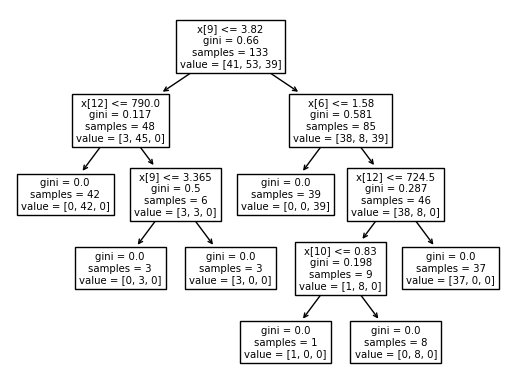

In [9]:
#Mostrar arbol de decisiones
plot_tree(arbol)

In [10]:
#Dar varible para realizar el test
predicciones = arbol.predict(X_test)

In [11]:
#Examinamos la matrix de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames = ['Actual'],colnames = ['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,18,0,0
2,1,16,1
3,0,0,9


In [12]:
#comparar valores reales con las predicciones realizadas
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.9555555555555556